# KRK Fault SP vs DP

## Run C++ examples

In [1]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

#1ms simulation
DURATION=20
STARTTIMEFAULT=10
ENDTIMEFAULT=10.2
TIMESTEP=1e-3
TIMESTEPSTR=$(printf "%1.6f\n" ${TIMESTEP})

SP_SynGenTrStab_KRK_TwoArea_SteadyState

[10:14:09.818206 PiLine56 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[10:14:09.818449 PiLine67 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[10:14:09.818685 Piline78_1 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[10:14:09.818908 Piline78_2 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[10:14:09.819109 Piline89_1 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[10:14:09.819342 Piline89_2 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[10:14:09.819555 PiLine910 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[10:14:09.819770 PiLine1011 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[10:14:09.820953 SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF info] Initialize simulation: SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF
[10:14:09.822408 SP_SynGenTrStab_KRK_TwoArea_SteadyState_

In [2]:
# Read results
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import re
import numpy as np
import math
import os
from datetime import date
import pandas as pd

%matplotlib widget

In [3]:
V_nom = 230e3

work_dir = 'logs/SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF/'
log_name = 'SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF'

print(work_dir + log_name + '.csv')

ts_pfsimpy = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
results_abs = pd.DataFrame(columns=['Bus', 'Voltage Mag [V]', 'Voltage Ang [deg]'])
i = 0

for node,node_data in ts_pfsimpy.items():
    results_abs.loc[i] = [node] + ["{0:.3f}".format(np.absolute(ts_pfsimpy[node].values[-1])/V_nom)] + ["{0:.3f}".format(np.degrees(np.angle(ts_pfsimpy[node].values[-1])) - 6.8)]
    i += 1

print(results_abs)

logs/SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF/SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF.csv
column number: 7
results length: 2
real column names: []
complex column names: ['v_bus10', 'v_bus11', 'v_bus5', 'v_bus6', 'v_bus7', 'v_bus8', 'v_bus9']
       Bus Voltage Mag [V] Voltage Ang [deg]
0  v_bus10           1.010           -16.584
1  v_bus11           1.030            -6.800
2   v_bus5           1.030            18.631
3   v_bus6           1.010             9.046
4   v_bus7           0.996             1.170
5   v_bus8           0.984           -11.780
6   v_bus9           1.002           -24.526


In [13]:
results = pd.DataFrame(columns=['Bus', 'Voltage Mag [V]', 'Voltage Ang [deg]'])
i = 0

for node,node_data in ts_pfsimpy.items():
    results.loc[i] = [node] + ["{0:.3f}".format(np.absolute(ts_pfsimpy[node].values[-1])/V_nom)] + ["{0:.3f}".format(np.degrees(np.angle(ts_pfsimpy[node].values[-1])))]
    i += 1

print(results)

       Bus Voltage Mag [V] Voltage Ang [deg]
0  v_bus10           1.010            -9.784
1  v_bus11           1.030             0.000
2   v_bus5           1.030            25.431
3   v_bus6           1.010            15.846
4   v_bus7           0.996             7.970
5   v_bus8           0.984            -4.980
6   v_bus9           1.002           -17.726


## Results 1ph SP

In [4]:
work_dir = 'logs/SP_SynGenTrStab_KRK_TwoArea_SteadyState_SP/'
log_name = 'SP_SynGenTrStab_KRK_TwoArea_SteadyState_SP'
print(work_dir + log_name + '.csv')
ts_sp1ph_TrStab_dl= rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/SP_SynGenTrStab_KRK_TwoArea_SteadyState_SP/SP_SynGenTrStab_KRK_TwoArea_SteadyState_SP.csv
column number: 61
results length: 30000
real column names: ['Ep_gen1', 'Ep_gen2', 'Ep_gen3', 'Ep_gen4', 'P_elec1', 'P_elec2', 'P_elec3', 'P_elec4', 'P_mech1', 'P_mech2', 'P_mech3', 'P_mech4', 'delta_gen1', 'delta_gen2', 'delta_gen3', 'delta_gen4', 'deltaref_gen1', 'deltaref_gen2', 'deltaref_gen4', 'wr_gen1', 'wr_gen2', 'wr_gen3', 'wr_gen4', 'wref_gen1', 'wref_gen2', 'wref_gen4']
complex column names: ['i_gen1', 'i_gen2', 'i_gen3', 'i_gen4', 'i_line1011', 'i_line56', 'i_line67', 'i_line78_1', 'i_line78_2', 'i_line89_1', 'i_line89_2', 'i_line910', 'i_load7', 'i_load9', 'v10', 'v11', 'v5', 'v6', 'v7', 'v8', 'v9', 'v_gen1', 'v_gen2', 'v_gen3', 'v_gen4', 'v_line1011', 'v_line56', 'v_line67', 'v_line78_1', 'v_line78_2', 'v_line89_1', 'v_line89_2', 'v_line910', 'v_load7', 'v_load9']


## Parameters

In [5]:
timestep=50e-6
t_begin=0
t_end=20

begin_idx = int(t_begin/timestep)
end_idx= int(t_end/timestep)

## Generator terminal voltage

Text(0.5, 1.0, 'Gen. 4')

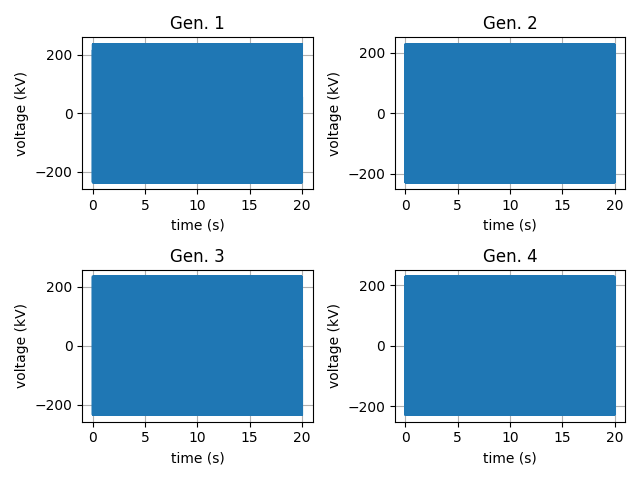

In [6]:
plt.figure()

plt.subplot(2, 2, 1)
for name in ['v_gen1']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G1')
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('voltage (kV)')
plt.title('Gen. 1')

plt.subplot(2, 2, 2)
for name in ['v_gen2']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G2')
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('voltage (kV)')
plt.title('Gen. 2')

plt.subplot(2, 2, 3)
for name in ['v_gen3']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G3')
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('voltage (kV)')
plt.title('Gen. 3')

plt.subplot(2, 2, 4)
for name in ['v_gen4']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G4')
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('voltage (kV)')
plt.title('Gen. 4')


## Generator terminal Current

Text(0.5, 1.0, 'Gen. 4')

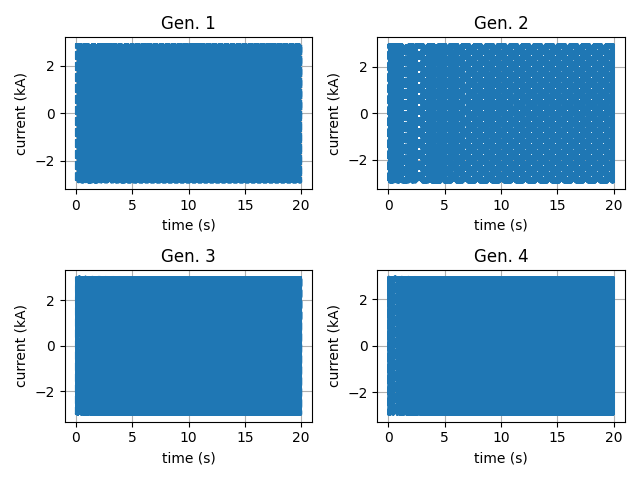

In [7]:
plt.figure()

plt.subplot(2,2,1)
for name in ['i_gen1']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('Gen. 1')

plt.subplot(2,2,2)
for name in ['i_gen2']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('Gen. 2')

plt.subplot(2,2,3)
for name in ['i_gen3']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('Gen. 3')

plt.subplot(2,2,4)
for name in ['i_gen4']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('Gen. 4')


Text(0.5, 1.0, 'i line 910')

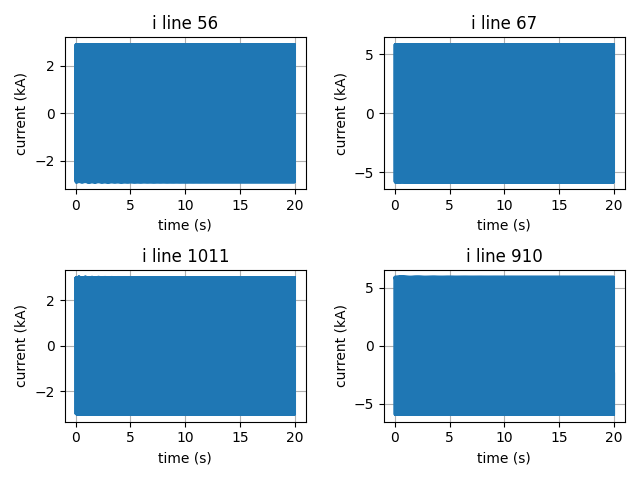

In [8]:
plt.figure()

plt.subplot(2,2,1)
for name in ['i_line56']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 56')
    
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('i line 56')

plt.subplot(2,2,2)
for name in ['i_line67']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 67')
    
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('i line 67')

plt.subplot(2,2,3)
for name in ['i_line1011']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 1011')
    
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('i line 1011')

plt.subplot(2,2,4)
for name in ['i_line910']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 910')
    
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('i line 910')

Text(0.5, 1.0, 'i line 89_1')

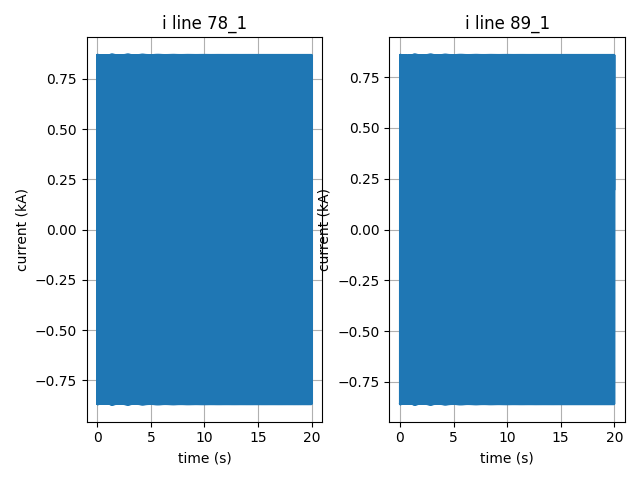

In [9]:
plt.figure()
plt.subplot(1,2,1)
for name in ['i_line78_1']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 78_1')
    
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('i line 78_1')

plt.subplot(1,2,2)
for name in ['i_line89_1']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 89_1')
    
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('current (kA)')
plt.title('i line 89_1')

## Generator electrical & mechanical energy

Text(0.5, 1.0, 'P_elec G4')

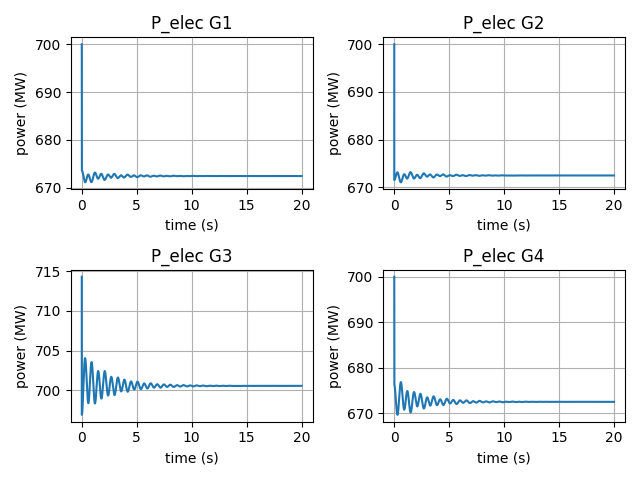

In [10]:
plt.figure()
    
plt.subplot(2,2,1)
for name in ['P_elec1']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='P_elec G1')
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('power (MW)')
plt.title('P_elec G1')

plt.subplot(2,2,2)
for name in ['P_elec2']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='P_elec G2')

# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('power (MW)')
plt.title('P_elec G2')

plt.subplot(2,2,3)
for name in ['P_elec3']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='P_elec G3')
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('power (MW)')
plt.title('P_elec G3')

plt.subplot(2,2,4)
for name in ['P_elec4']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='P_elec G4')
# plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('power (MW)')
plt.title('P_elec G4')

## Rotor angular speed $\omega_r$

Text(0.5, 1.0, '$\\omega_{r,4}$')

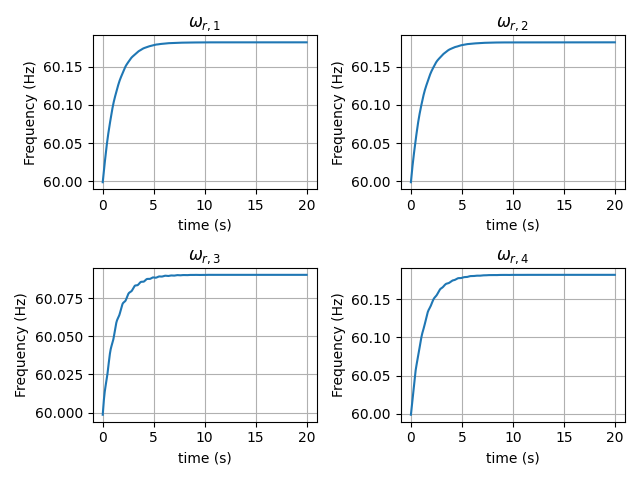

In [11]:
plt.figure()

plt.subplot(2,2,1)
for name in ['wr_gen1']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='G1')
# plt.legend(loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.title('$\omega_{r,1}$')

plt.subplot(2,2,2)
for name in ['wr_gen2']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='G2')
# plt.legend(loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.title('$\omega_{r,2}$')

plt.subplot(2,2,3)
for name in ['wr_gen3']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='G3')
# plt.legend(loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.title('$\omega_{r,3}$')

plt.subplot(2,2,4)
for name in ['wr_gen4']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='G4')
# plt.legend(loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.title('$\omega_{r,4}$')

## Rotor angle $\delta _r$

Text(0.5, 1.0, '$\\delta_4$')

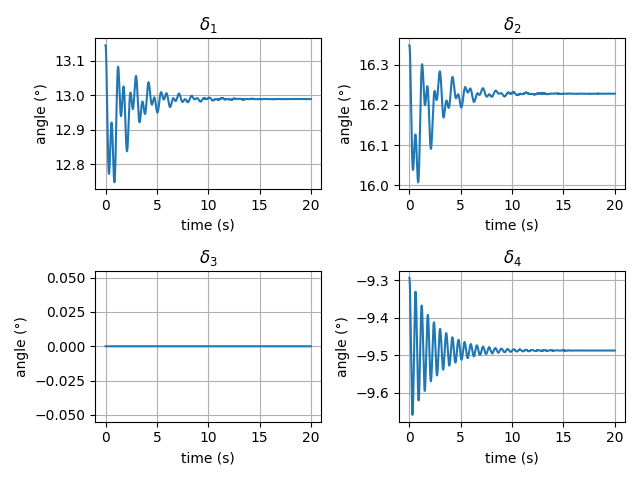

In [12]:
plt.figure()

plt.subplot(2,2,1)
for name in ['delta_gen1']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],
        ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14 - ts_sp1ph_TrStab_dl['deltaref_gen1'].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='SP')
# plt.legend(loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('angle (°)')
plt.grid()
plt.tight_layout()
plt.title('$\delta_1$')

plt.subplot(2,2,2)
for name in ['delta_gen2']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],
        ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14 - ts_sp1ph_TrStab_dl['deltaref_gen2'].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='SP')
# plt.legend(loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('angle (°)')
plt.grid()
plt.tight_layout()
plt.title('$\delta_2$')

plt.subplot(2,2,3)
for name in ['delta_gen3']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],
        ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14 - ts_sp1ph_TrStab_dl['delta_gen3'].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='SP')
# plt.legend(loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('angle (°)')
plt.grid()
plt.tight_layout()
plt.title('$\delta_3$')

plt.subplot(2,2,4)
for name in ['delta_gen4']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],
        ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14 - ts_sp1ph_TrStab_dl['deltaref_gen4'].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='SP')
# plt.legend(loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('angle (°)')
plt.grid()
plt.tight_layout()
plt.title('$\delta_4$')
